# Post-processing using `SGAtools`

**Requirements**:

    R
    install.packages("BiocManager")
    library(BiocManager)
    install(c("logger","logging","bootstrap"))

In [1]:
## logging
# options(show.error.locations = TRUE)
## loading required libraries
source("rscripts/SGAtools.R")

In [2]:
## parameters
input_path=NULL#"examples/inputs/image_example1.dat"
output_path=NULL#"examples/outputs/image_example1.dat"

replicates=4
linkage_cutoff=-1
keep_large=FALSE 
overall_plate_median=510
max_colony_size=1.5*overall_plate_median
intermediate_data=F
linkage_file=NULL
linkage_genes=NULL

In [3]:
# Parameters
input_path = "examples/inputs/image_example1.dat"
output_path = "examples/outputs//image_example1.tsv"
replicates = 4
linkage_cutoff = -1
keep_large = FALSE
overall_plate_median = 510
max_colony_size = 765.0
intermediate_data = FALSE
linkage_file = NULL
linkage_genes = NULL


In [4]:
## inferred parameters
output_dir_path <- dirname(input_path)

if (is.null(linkage_file)) {
  linkage_file <- ''
}
print(linkage_file)
if (is.null(linkage_genes)) {
  linkage_genes <- character(0)
}
print(linkage_genes)

[1] ""


character(0)


## Input data

In [5]:
# pre-processed
df01 <- read.table(input_path, sep = "\t", header = TRUE)
head(df01,1)

,row,col,size,circularity
,<int>,<int>,<dbl>,<dbl>
1,1,1,3861,0.861296


### Plots for the input data

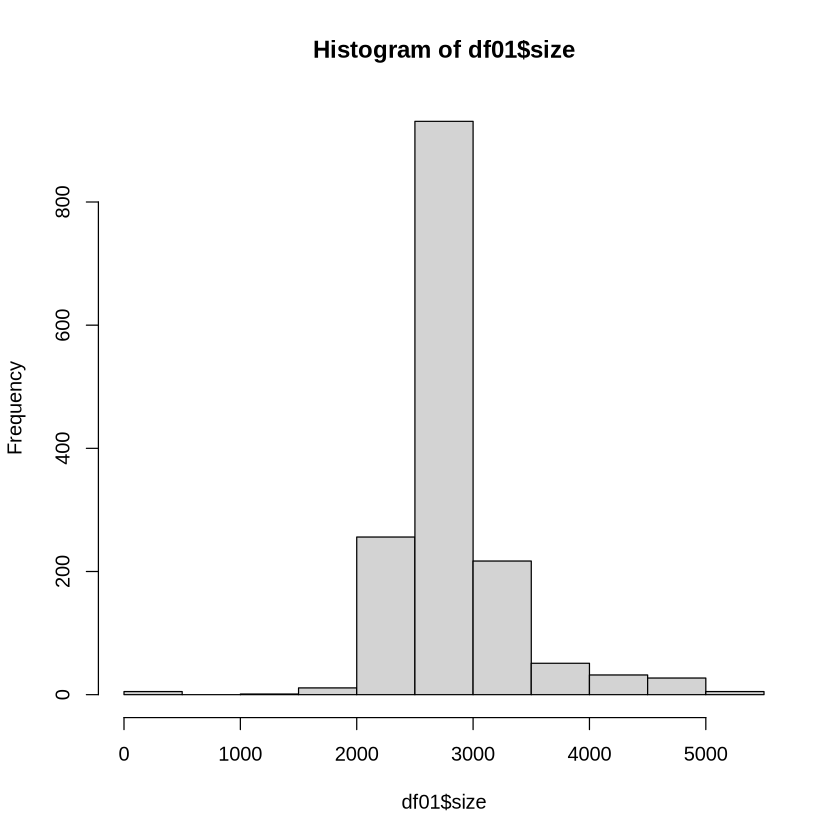

In [6]:
hist(df01$size)

## Normalization

In [7]:
df1 = normalizeSGA(
    df01,
    replicates=replicates,
    linkage.cutoff=linkage_cutoff,
    keep.large=keep_large, #?
    overall.plate.median=overall_plate_median,
    max.colony.size=max_colony_size,
    intermediate.data=intermediate_data,
    # linkage.file=linkage_file, #todo
    linkage.genes=linkage_genes,
    )

2024-02-26 14:56:44.411711 INFO::Normalizing plate: replicates = 4, overall.plate.median = 510, max.colony.size = 765
2024-02-26 14:56:44.411711 INFO::Normalizing plate: replicates = 4, overall.plate.median = 510, max.colony.size = 765
2024-02-26 14:56:44.416057 INFO::Assigning group ids?
2024-02-26 14:56:44.416057 INFO::Assigning group ids?
2024-02-26 14:56:44.420405 INFO::Preprocessing2
2024-02-26 14:56:44.420405 INFO::Preprocessing2
2024-02-26 14:56:44.420852 INFO::(F1) Linkage effect filter
2024-02-26 14:56:44.420852 INFO::(F1) Linkage effect filter
2024-02-26 14:56:44.433196 INFO::# Applying linkage filter, linkage.cutoff = -1
2024-02-26 14:56:44.433196 INFO::# Applying linkage filter, linkage.cutoff = -1
2024-02-26 14:56:44.435441 INFO::Linkage file is at:
2024-02-26 14:56:44.435441 INFO::Linkage file is at:
2024-02-26 14:56:44.435894 INFO::Chromosome coordinates file does not exist, returning empty data frame
2024-02-26 14:56:44.435894 INFO::Chromosome coordinates file does not 

## Output data

In [8]:
if (!file.exists(output_dir_path)) {
  dir.create(output_dir_path, recursive = TRUE)
}

In [9]:
# str(df1)
df1$kvp <- sapply(df1$kvp, toString)

In [10]:
write.table(
    df1,
    file=output_path,
    sep="\t", row.names = FALSE,
)
head(df1)

,row,col,size,circularity,colonysize,ncolonysize,kvp
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,3861,0.8612960,3861,1.0046823,
2,1,2,3060,0.8894521,3060,0.9251287,
3,1,3,2962,0.9150902,2962,1.0517116,
4,1,4,2721,0.9170527,2721,1.0196817,
5,1,5,2557,0.9042184,2557,0.9883676,
6,1,6,3119,0.9169053,3119,1.2351216,


### Plots for the normalized data

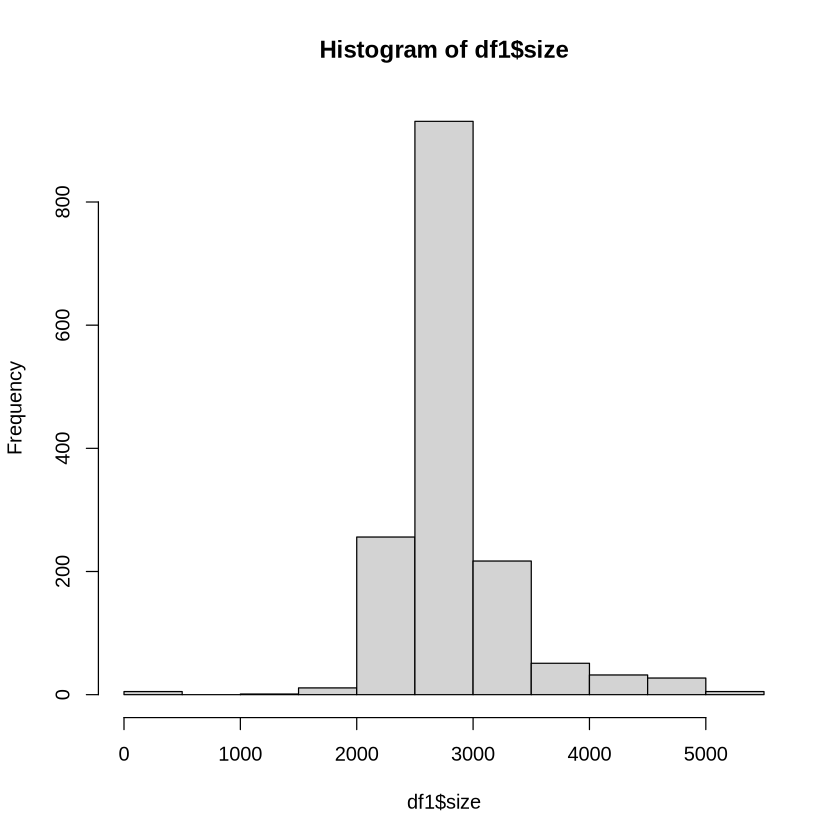

In [11]:
hist(df1$size)

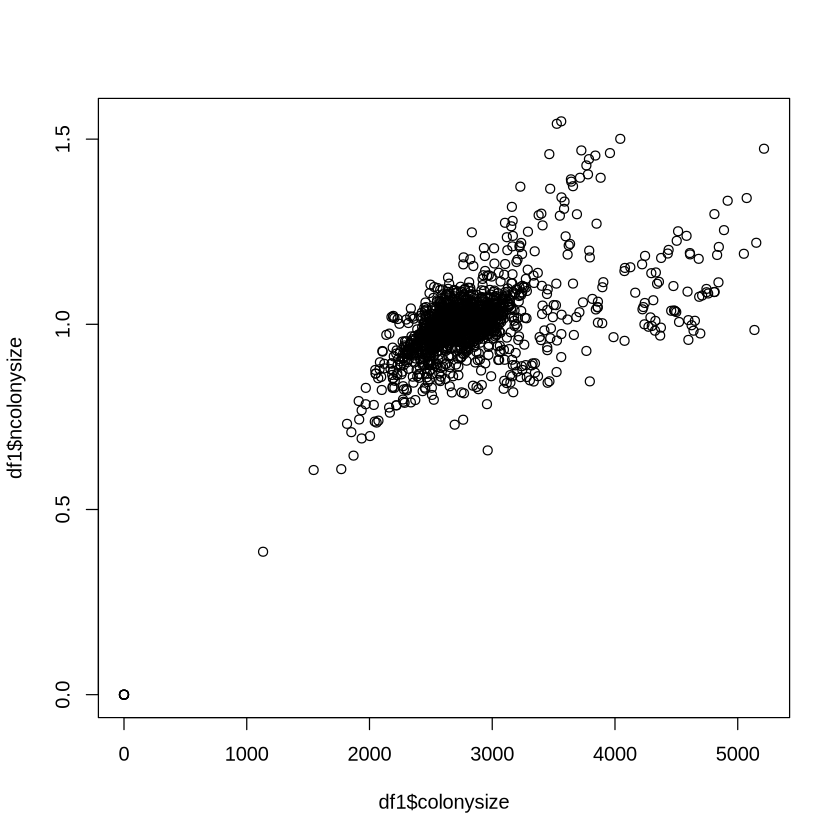

In [12]:
plot(df1$colonysize,df1$ncolonysize)

In [13]:
xfun::session_info()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.1 LTS

Locale:
  LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
  LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
  LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
  LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

Package version:
  base64enc_0.1-3     bootstrap_2019.6    cli_3.6.1          
  compiler_4.3.2      crayon_1.5.2        digest_0.6.33      
  ellipsis_0.3.2      evaluate_0.23       fansi_1.0.5        
  fastmap_1.1.1       glue_1.6.2          graphics_4.3.2     
  grDevices_4.3.2     htmltools_0.5.7     IRdisplay_1.1      
  IRkernel_1.3.2.9000 jsonlite_1.8.7      lifecycle_1.0.4    
  logging_0.10-108    magrittr_2.0.3      methods_4.3.2      
  pbdZMQ_0.3-10       pillar_1.9.0        repr_1.1.6         
  rlang_1.1.2         stats_4.3.2         stringi_1.8.1      
  stringr_1.5.1       tools_4.3.2         utf8_1.2.4         
  utils_4.3.2         uuid_1.1-1          vctrs_0.6.4        
  xfun_0.41